# Training and Test sets

We have seen how detrimental overfitting can be to predictive models. Models biased for the sample they were fitted (trained) on might not capture much form the underlying true relationship.
The next step is to evaluate, how much predictive performance we have when we rule out the effect of overfitting.
There is a very straightforward solution: we can simply obtain predictions with our fitted model on data that it haven't seen before.

Below, we re-compute two models that we have fitted in the previous section and obtain more data that the models haven't seen before and use it for testing their *unbiased* predictive performance.

Let's import some libraries and load our example dataset. The first 70 participants are loaded into `df_train`. Then, another 70 are loaded into `df_test`.

In [88]:
!pip install scikit-learn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pd.read_csv("https://raw.githubusercontent.com/pni-lab/predmod_lecture/master/ex_data/IXI/ixi.csv")
train = df.index[:80]
test = df.index[80:160]
features = df.columns[2:]
target = 'Age'

You should consider upgrading via the '/home/tspisak/src/RPN-signature/venv/bin/python -m pip install --upgrade pip' command.


## Train overfitted models

First, we train `model_1` with one single predictor, the right superior frontal cortex volume.

MAE: 12.7710554136974


<AxesSubplot:xlabel='Age'>

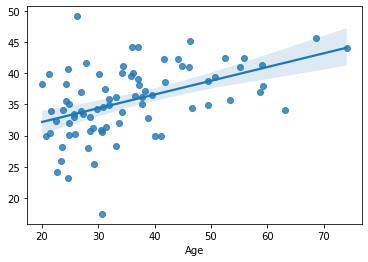

In [126]:
model_1 = LinearRegression().fit(y=df.loc[train, target], X=df.loc[train, ['rh_superiorfrontal_volume']])
yhat = model_1.predict(df.loc[train, ['rh_superiorfrontal_volume']])
mae_model_1_train = np.mean(np.abs(df.loc[test, target] - yhat))
print('MAE:', mae_model_1_train)
sns.regplot(x=df.loc[train, target], y=yhat)

Then,we train `model_2` with all available predictors.

MAE: 3.2574285440159656


<AxesSubplot:xlabel='Age'>

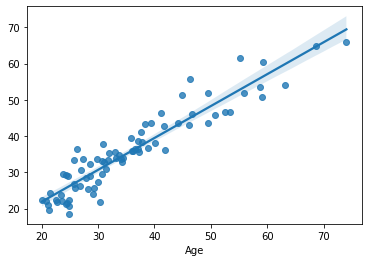

In [127]:
model_2 = LinearRegression().fit(y=df.loc[train, target], X=df.loc[train, features])
yhat = model_2.predict(df.loc[train, features])
mae_model_2_train = np.mean(np.abs(df.loc[train, target] - yhat))
print('MAE:', mae_model_2_train)
sns.regplot(x=df.loc[train, target], y=yhat)

Finally, we train `model_3`, a dummy model with random features that are guaranteed to be independent form the target.

MAE: 3.9538865240948704


<AxesSubplot:xlabel='Age'>

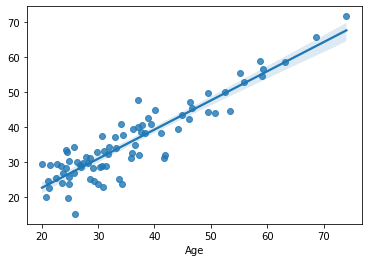

In [128]:
rng = np.random.default_rng(seed = 42)
df_random = pd.DataFrame(rng.normal(loc=np.mean(df.loc[train, features]), scale=np.std(df.loc[train, features]), size=(len(train), len(features))))
model_3 = LinearRegression().fit(y=df.loc[train, target], X=df_random)
yhat = model_3.predict(df_random)
mae_model_3_train = np.mean(np.abs(df.loc[train, target] - yhat))
print('MAE:', mae_model_3_train)
sns.regplot(x=df.loc[train, target], y=yhat)

## Test overfitted models on unseen data

Here comes the moment if justice! Let's test all models on the test set, i.e. on data that the model haven't seen during training.

MAE: 10.51406018565751


<AxesSubplot:xlabel='Age'>

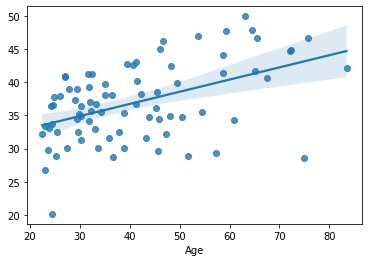

In [103]:
yhat = model_1.predict(df.loc[test, ['rh_superiorfrontal_volume']])
mae_model_1_test = np.mean(np.abs(df.loc[test, target] - yhat))
print('MAE:', mae_model_1_test)
sns.regplot(x=df.loc[test, target], y=yhat)

MAE: 14.418876799838511


<AxesSubplot:xlabel='Age'>

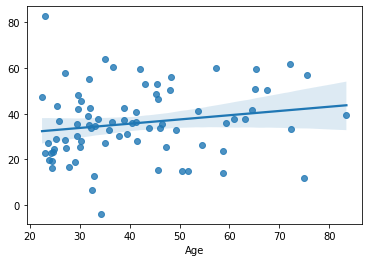

In [104]:
yhat = model_2.predict(df.loc[test, features])
mae_model_2_test = np.mean(np.abs(df.loc[test, target] - yhat))
print('MAE:', mae_model_2_test)
sns.regplot(x=df.loc[test, target], y=yhat)

MAE: 24.69969184046377


<AxesSubplot:xlabel='Age'>

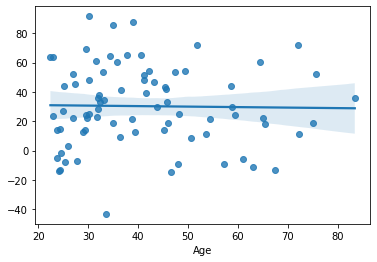

In [114]:
yhat = model_3.predict(df.loc[test, features])
mae_model_3_test = np.mean(np.abs(df.loc[train, target] - yhat))
print('MAE:', mae_model_3_test)
sns.regplot(x=df.loc[test, target], y=yhat)

Let's summarise the results!

<AxesSubplot:xlabel='model', ylabel='MAE'>

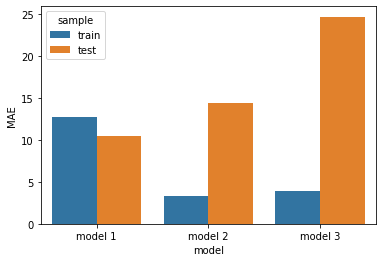

In [129]:
summary = pd.DataFrame([[mae_model_1_train, 'model 1', 'train'],
                        [mae_model_1_test, 'model 1', 'test'],
                        [mae_model_2_train, 'model 2', 'train'],
                        [mae_model_2_test, 'model 2', 'test'],
                        [mae_model_3_train, 'model 3', 'train'],
                        [mae_model_3_test, 'model 3', 'test']], columns=['MAE', 'model', 'sample'])

sns.barplot(x='model', y='MAE', hue='sample', data=summary)

What we see that performance on the training and test sets can be strikingly different.
The simplest model (`model_1`) with a single predictor performed best on the test set, actually even better (lower error) than on the training set, implying a negligible level of overfit in this model.
The other two models were much more complex, i.e. they had a lot more parameters to overfit. Indeed, while they seemed to perform significantly better than `model_1` on the trainig set, their performance strikingly dropped on the test set. These models heavily overfitted the training data.

Even though it overfitted the training sample, `model_2` has captured some generalizable knowledge, as well. On the other hand, `model_3` (as expected) didn't perform better than chance on the test set and all its performance on the training set has to be attributed to overfitting.

## Train-test split

Holding out a test set (or measuring new data post model training) is a very common practice in predictive modelling and machine learning, providing a very straightforward solution for ruling out the effect of overfitting and  to obtain unbiased estimates of predictive performance.

However, due to the costs of the data acquisition, holding out a large number of participants solely for testing is a luxury.
In the [next section](cv.ipynb) we will see, how cross-validation can help in getting out the most of our data when training predictive models.